<a href="https://colab.research.google.com/github/PX2145-2025/week-2-b-Huggins-Samuel/blob/main/Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Week 2
from numpy import array,sqrt,pi,sin
from numpy import linspace, loadtxt, savetxt, column_stack
from numpy.random import rand
from matplotlib.pyplot import savefig, plot, xlabel, ylabel, title, legend
from numpy import sqrt, pi

In [2]:
# Exercise 0

# Saving the functions below to a .py file

%%writefile anglesutils.py

# Writing code for angle change function
def convert(angle):
  """
  Return the given angle converted to radians.
  """
  return (angle*pi)/180

# Writing code to wrap angles
def recenter(angle):
  """
  Return the given angle wrapped between pi and -pi.
  """
  if angle > pi:
    return angle - 2*pi
  elif angle < -pi:
    return angle + 2*pi
  else:
    return angle

# Answering Question
from angleutils import *
position(t)=45+(1/2)*2*t^2


Overwriting anglesutils.py


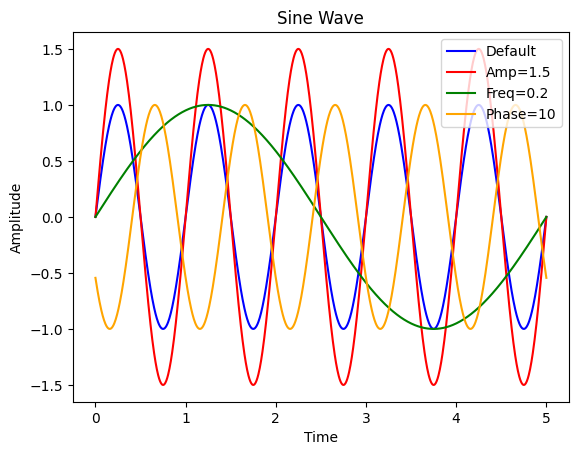

In [3]:
# Exercide 1

# Defining the function
def func1(time,amplitude,frequency,phase):
    """
    Returns a sine wave of the given parameters.
    """
    return amplitude*sin(2*pi*frequency*time+phase)

# Defining Variables
amplitude=1
frequency=1
phase=0
time=linspace(0,5,1000)

# Plotting sine waves
# Plotting default values
sine_wave=func1(time,amplitude,frequency,phase)
plot(time,sine_wave, color='blue', label="Default")

# Plotting alternative amp, fre, phase values
sine_wave=func1(time,1.5,frequency,phase)
plot(time,sine_wave, color='red', label="Amp=1.5")

# Plotting alternative amp, fre, phase values
sine_wave=func1(time,amplitude,0.2,phase)
plot(time,sine_wave, color='green', label="Freq=0.2")

# Plotting alternative amp, fre, phase values
sine_wave=func1(time,amplitude,frequency,10)
plot(time,sine_wave, color='orange', label="Phase=10")

# Plotting Sine waves
title('Sine Wave')
xlabel('Time')
ylabel('Amplitude')
legend()

# Exercise 2 (Proof)

$$T=\sqrt(\frac{(4\pi^2r^3)}{GM})$$
$$T^2=\frac{(4\pi^2r^3)}{GM}$$
$$T^2GM=(4\pi^2r^3)$$
$$\frac{T^2GM}{(4\pi^2)}=r^3$$
$$(\frac{T^2GM}{(4\pi^2)})^{1/3}=r$$
$$r=h+R$$
$$(\frac{T^2GM}{(4\pi^2)})^{1/3}-R=h$$

In [4]:
# Exercise 2 (coding)

# Writing Function to evaluate h
G=6.6743*10**-11 # m**3 kg*-1 s*-2
M=5.972*10**24 #kg
R=6378000 #m

def orbit(G,M,T,R):
  """
  Evaluate h for the given parameters.
  """
  return (((G*M*T**2)/(4*pi**2))**(1/3))-R


# Request user input of T
T=float(input("Enter the orbital period T in seconds: "))

# Calculate altitude in meters
altitude_meters=orbit(G,M,T,R)

# Convert altitude to kilometers and print
altitude_kilometers=altitude_meters/1000

print(f"The altitude is: {altitude_kilometers} kilometers")


Enter the orbital period T in seconds: 5400
The altitude is: 274.49313741084467 kilometers


In [5]:
# When T=45 mins (5400 seconds), h= 274.5 km
# When T=90 mins (10800 Seconds), h= 4182.2 km
# WHen T=1 day (86,400 Seconds), h=35862.7 km
# The calculations conclude that the altitude increases rapidly with time period.

In [6]:
# Exercise 3

# Writing the function into a file:
%%writefile linfit.py
from numpy import sqrt, pi # Import sqrt and pi

# Writing the function
def linfit(x,y):
  """
  Returns the slope and intercept of the best fit line, and their errors.
  """
  # From last year
  n=len(x)
  sum_x=sum(x)
  sum_y=sum(y)
  sum_x2=sum(x**2)
  sum_xy=sum(x*y)

  # Calculate the slope and intercept
  delta=n*sum_x2-sum_x**2
  if delta==0:
    return None, None, None, None # These 2 lines of code return 0 for all 4 values of the linfit function, to avoide dividing by zero.

  slope=(n*sum_xy-sum_x*sum_y)/delta
  intercept=(sum_y*sum_x2-sum_x*sum_xy)/delta

  # Calculate the errors
  # First, calculate the standard deviation of the residuals
  residuals = y - (slope * x + intercept)
  sigma_y = (sum(residuals**2) / (n - 2))**(1/2)

  # Calculate the error in the slope and intercept
  error_slope = sigma_y * ((n / delta)**(1/2))
  error_intercept = sigma_y * (sum_x2 / delta)**(1/2)


  return slope, intercept, error_slope, error_intercept

Writing linfit.py


Slope: 2.38
Intercept: -0.66
Error in slope: 0.12165525060596435
Error in intercept: 0.40348482003664016
The function clearly works as expected, plotting the straight line graph for random x,y data, and giving the respective errors.


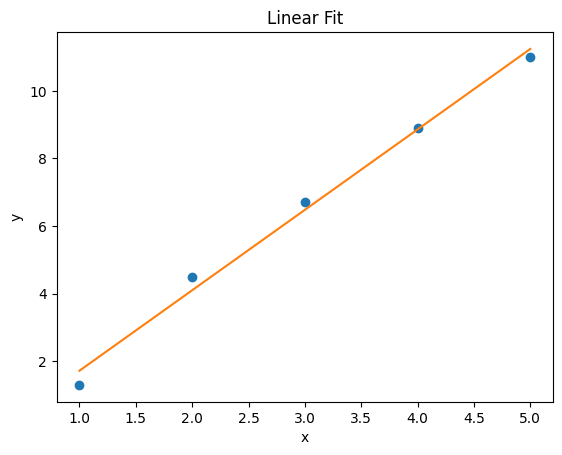

In [19]:
# Testing the linfit.py file/code

from linfit import *
from numpy import array # Import array

x_data=[1,2,3,4,5]
y_data=[1.3,4.5,6.7,8.9,11]

# Convert lists to numpy arrays
x_data_array = array(x_data)
y_data_array = array(y_data)

slope, intercept, error_slope, error_intercept=linfit(x_data_array,y_data_array)

# Print the results to see the output
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Error in slope: {error_slope}")
print(f"Error in intercept: {error_intercept}")

# Plotting the graph
plot(x_data_array,y_data_array,'o')
plot(x_data_array,slope*x_data_array+intercept)
xlabel('x')
ylabel('y')
title('Linear Fit')

# Comment
print("The function clearly works as expected, plotting the straight line graph for random x,y data, and giving the respective errors.")